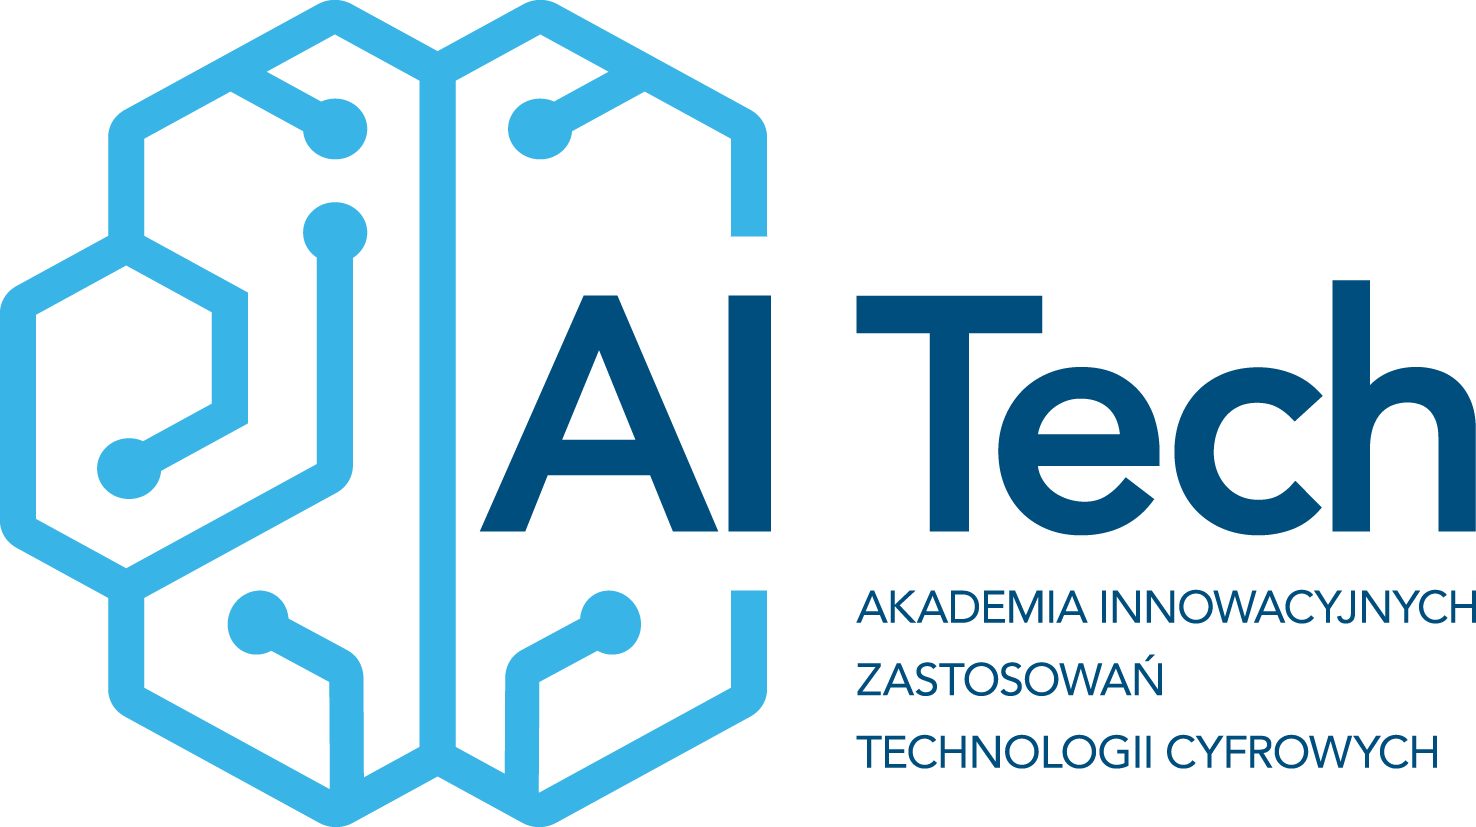



AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
<br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">SKRYPT DO LABORATORIUM</style></h1>
    <h1 style = "font-size:24px">Uczenie głebokie</style></h1>
    <h1 style = "font-size:24px; font-weight:normal">LABORATORIUM 2:</style></h1>
    <h1 style = "font-size:24px">Wykorzystanie sieci splotowych i rozwiązywanie problemów</style></h1>
    <h1 style = "font-size:24px">Przemysław Rośleń</style></h1>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

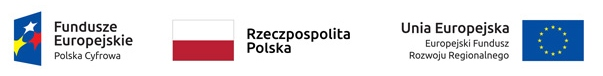

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

## **1.** Stworzenie sieci splotowej i zapobieganie jej przeuczeniu z wykorzystaniem różnych metod przeciwdziałania temu zjawisku

W pierwszym etapie przygotujmy dane do treningu - wykorzystamy zbiór Fashion MNIST.

> [Zbiór Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)


**1a.** Wczytaj zbiór danych Fashion MNIST. Ze zbioru testowego wyodrębnij 50% danych - zbiór walidacyjny.

In [ ]:
#wyświetlanie wszystkich wyników z komórki
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# tutaj umieść rozwiązanie
import tensorflow as tf
from sklearn.model_selection import train_test_split

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_test, y_valid, y_test = train_test_split(
    x_test, y_test, test_size=0.5, random_state=42)

print("Rozmiar zbioru treningowego:", x_train.shape)
print("Rozmiar zbioru walidacyjnego:", x_valid.shape)
print("Rozmiar zbioru testowego:", x_test.shape)

Rozmiar zbioru treningowego: (60000, 28, 28)
Rozmiar zbioru walidacyjnego: (5000, 28, 28)
Rozmiar zbioru testowego: (5000, 28, 28)


Dostosujmy kształt danych wejściowych.

In [ ]:
import numpy as np

#kształt danych -  (liczba_wierszy, liczba_kolumn, liczba_kanałów)
x_train = x_train[:, :, :, np.newaxis]
x_valid = x_valid[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print("Rozmiar zbioru treningowego:", x_train.shape)
print("Rozmiar zbioru walidacyjnego:", x_valid.shape)
print("Rozmiar zbioru testowego:", x_test.shape)

Rozmiar zbioru treningowego: (60000, 28, 28, 1)
Rozmiar zbioru walidacyjnego: (5000, 28, 28, 1)
Rozmiar zbioru testowego: (5000, 28, 28, 1)


W kolejnym kroku zdefiniujmy prosty model sieci splotowej.

In [ ]:
no_of_classes = 10
(img_width, img_height, img_depth)  = (28, 28, 1)

# definicja modelu
model_simple = tf.keras.Sequential([

    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu',
                           input_shape=(img_width, img_height, img_depth), padding='SAME'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='SAME'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')

  ])

model_simple.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# wyświetlenie architektury
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2336      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

W ostatnim etapie zdefiniujmy hiperparametry oraz rozpocznijmy uczenie modelu na danych treningowych.

In [ ]:
# wybór parametrów uczenia
batch_size = 32
epochs = 15
learning_rate = 0.01

In [ ]:
# trening modelu
history_simple = model_simple.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid, y_valid))

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1456 - accuracy: 0.9453 - val_loss: 0.3835 - val_accuracy: 0.8956
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1320 - accuracy: 0.9503 - val_loss: 0.3712 - val_accuracy: 0.8980
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1271 - accuracy: 0.9525 - val_loss: 0.3857 - val_accuracy: 0.8992
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1187 - accuracy: 0.9553 - val_loss: 0.4168 - val_accuracy: 0.8972
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1124 - accuracy: 0.9575 - val_loss: 0.4001 - val_accuracy: 0.9022
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1055 - accuracy: 0.9601 - val_loss: 0.4166 - val_accuracy: 0.9018
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1030 - accuracy: 0.9620 - val_loss: 0.4609 - val_accuracy:

**1b.** Wyświetl na jednym wykresie, wykorzystując historię treningu modelu, jak zmieniała się dokładność dla danych treningowych i walidacyjnych. Czy da się zauważyć na wykresie jakąś zależność? Czy trening przebiegł w sposób, jaki byśmy oczekiwali?

Text(0.5, 1.0, 'Model Training Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

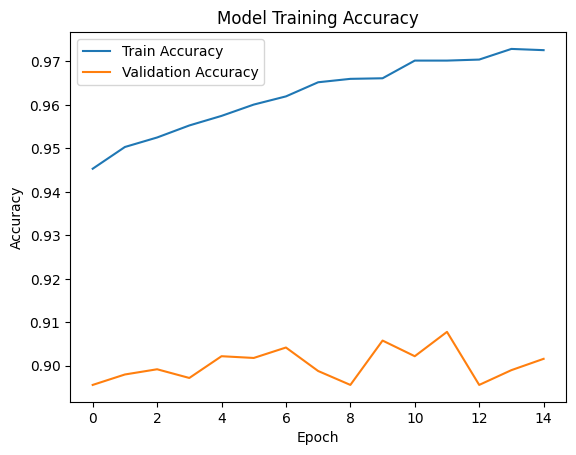

In [ ]:
# tutaj umieść kod
import matplotlib.pyplot as plt

history = history_simple.history

plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Po spadkach dokładności na zbiorze walidacyjnym widać, że model uległ w pewnym stopniu zjawisku przetrenowania.

W celu poprawy wyników, które uzyskujemy oraz dodatkowo - aby zapobiegać nadmiernemu dopasowaniu do danych treningowych i uzyskiwaniu dobrej generalizacji, sprawdźmy kilka technik, które pomagają w przeciwdziałaniu przeuczeniu modelu.

Pierwszą techniką będzie **normalizacja danych**. W tym przypadku przeskalujmy dane wejściowe do zakresu od 0 do 1.

**1c.** Wykorzystując jedną z warstw przetwarzania wstępnego danych, uzupełnij poniższy kod tak, aby stworzyć możliwość normalizacji danych do zakresu 0-1.



> [Dokumentacja - warstwy przetwarzania wstępnego](https://keras.io/guides/preprocessing_layers/)



In [ ]:
# tutaj umieść rozwiązanie

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
x_train_normalized = normalization_layer(x_train)
x_valid_normalized = normalization_layer(x_valid)
x_test_normalized = normalization_layer(x_test)

print("Shape of normalized training set:", x_train_normalized.shape)
print("Shape of normalized validation set:", x_valid_normalized.shape)
print("Shape of normalized test set:", x_test_normalized.shape)
print("Min value of normalized training set:", np.min(x_train_normalized))
print("Max value of normalized training set:", np.max(x_train_normalized))

Shape of normalized training set: (60000, 28, 28, 1)
Shape of normalized validation set: (5000, 28, 28, 1)
Shape of normalized test set: (5000, 28, 28, 1)
Min value of normalized training set: 0.0
Max value of normalized training set: 1.0


Kolejną techniką, która wspomaga przeciwdziałanie przeuczeniu modelu, jest **augmentacja danych**. W szczególności powinna być stosowana, jeśli nasz zbiór danych zawiera mało przykładów treningowych - model nie może się uczyć uogólnień, które mógłby wykorzystać przy przetwarzaniu nowych danych. Stosując augmentację, sieć nie zobaczy tego samego obrazu dwukrotnie, jednak obrazy będą wyglądały wiarygodnie i będą do siebie zbliżone, więc będzie ona w stanie zwrócić uwagę na więcej aspektów przetwarzanych danych i tworzyć lepsze uogólnienia.

**1d.** Wykorzystując dostępne warstwy przetwarzania wstępnego w pakiecie Keras, stwórz model sekwencyjny, zawierający minimum trzy operacje na obrazie (np. powiększenie, obrót itp.). Wykorzystując dowolny obraz ze zbioru testowego, pokaż trzykrotne wywołanie tego modelu na tym samym obrazie, aby zaprezentować losowość działania tych przekształceń.

<Figure size 1000x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Original Image')

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Transformed Image 1')

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Transformed Image 2')

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Transformed Image 3')

(-0.5, 27.5, 27.5, -0.5)

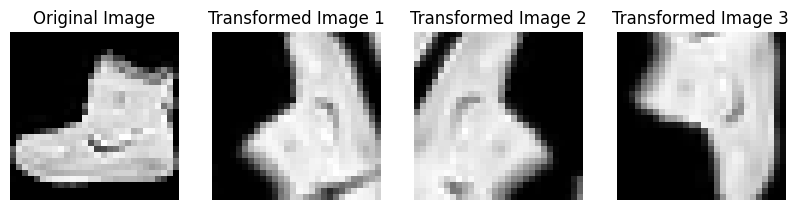

In [ ]:
#tutaj umieść rozwiązanie
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom, RandomRotation, RandomFlip
import matplotlib.pyplot as plt

sample_image = x_train[0]

model = Sequential()
model.add(RandomZoom(0.1))
model.add(RandomRotation(30))
model.add(RandomFlip())


plt.figure(figsize=(10, 4))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(sample_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed Images
for i in range(2, 5):
    transformed_image = model(sample_image)
    plt.subplot(1, 4, i)
    plt.imshow(transformed_image, cmap='gray')
    plt.title(f'Transformed Image {i-1}')
    plt.axis('off')

plt.show()

Kolejną z technik wykorzystywaną do zmniejszania ryzyka przeuczenia się sieci jest losowe **porzucanie** (ang. *dropout*), które polega na losowym wybieraniu zadanej liczby cech wyjściowych warstwy podczas trenowania - wartości tych warstw zastępuje się zerami. Na przykładzie poniżej pokazano, jak dla pewnej warstwy wyjściowej może wyglądać zastosowanie tej techniki. *Współczynnik porzucania cech* to ułamek określający część cech, która zostanie wyzerowana. Pozostałe wartości są skalowane o współczynnik równy współczynnikowi porzucania.



> [Dokumentacja - warstwa dropout](https://keras.io/api/layers/regularization_layers/dropout/)



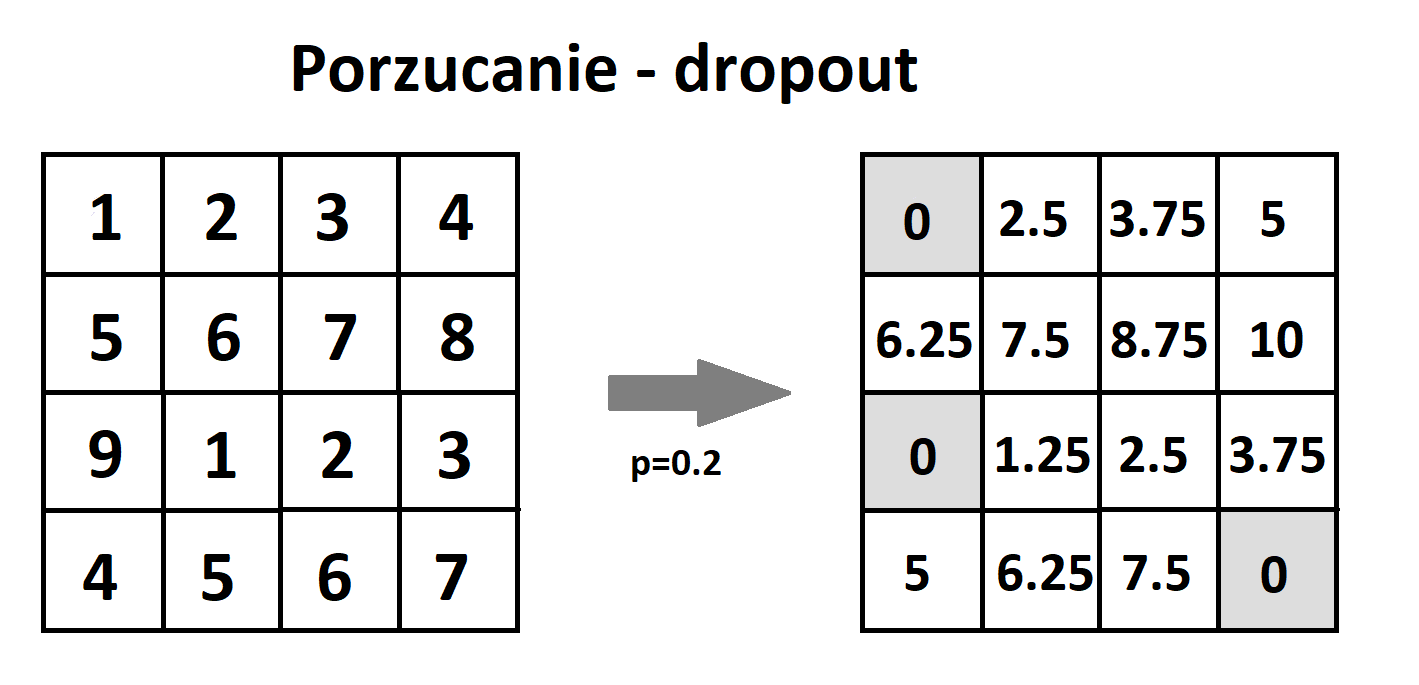

**1e.** Wykorzystując stworzone we wcześniejszych krokach: normalizację, augmentację oraz technikę porzucania, stwórz nowy model modyfikując strukturę modelu *model_simple*. Przed pierwszą warstwą splotową dodaj normalizację, a następnie augmentację danych. Po każdej z warstw maxpooling dodaj porzucanie z prawdopodobieństwem 0.2. Wytrenuj model na danych treningowych i monitoruj jakie parametry uzyskiwane są dla danych walidacyjnych. Wyświetl także wykres zmiany miary dokładności w trakcie kolejnych epok uczenia dla danych walidacyjnych i treningowych. Czy zastosowanie tych technik przyniosło korzyść?

In [ ]:
# tutaj umieść rozwiązanie

no_of_classes = 10
(img_width, img_height, img_depth)  = (28, 28, 1)

# normalizacja
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

# definicja modelu
model = tf.keras.Sequential([
    normalization_layer,
    RandomZoom(0.1),
    RandomRotation(30),
    RandomFlip(),
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu',
                           input_shape=(img_width, img_height, img_depth), padding='SAME'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='SAME'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')

  ])

model.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# wybór parametrów uczenia
batch_size = 32
epochs = 15
learning_rate = 0.01

# trening modelu
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid, y_valid))

Epoch 1/15
1875/1875 [==============================] - 13s 6ms/step - loss: 1.1669 - accuracy: 0.5608 - val_loss: 0.9201 - val_accuracy: 0.6502
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9039 - accuracy: 0.6555 - val_loss: 0.8145 - val_accuracy: 0.6878
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8269 - accuracy: 0.6875 - val_loss: 0.7516 - val_accuracy: 0.7190
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7843 - accuracy: 0.7045 - val_loss: 0.7288 - val_accuracy: 0.7148
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7490 - accuracy: 0.7190 - val_loss: 0.6771 - val_accuracy: 0.7506
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7248 - accuracy: 0.7303 - val_loss: 0.7284 - val_accuracy: 0.7298
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7019 - accuracy: 0.7398 - val_loss: 0.6376 - val_ac

Text(0.5, 1.0, 'Model Training Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

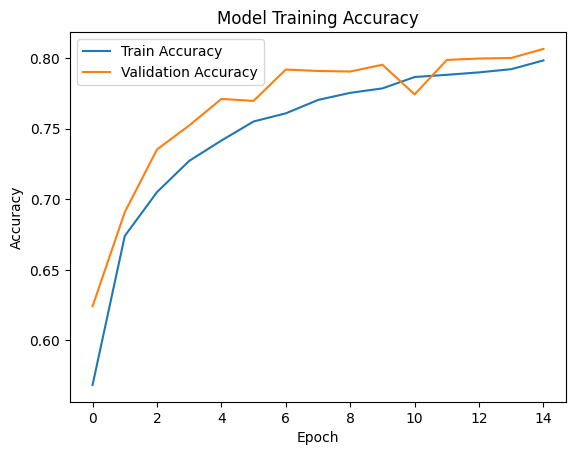

In [ ]:
# tutaj umieść kod
import matplotlib.pyplot as plt

history = history_simple.history

plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Po wprowadzonych normalizacjach i augmentacjach rezultaty dla zbioru treningowego i walidacyjnego są bardzo zbliżone w przeciwieństwie do tego jak miało to miejsce dla prostego modelu bez preprocessingu. Po wprowadzonych ulepszeniach model ma nappewno lepsze zdolności generalizacyjne.

Często zdarza się podczas uczenia jakiegoś modelu, zwłaszcza kiedy w pewnym momencie model zaczyna nadmiernie dopasowywać do danych treningowych, błąd uogólniania zaczyna rosnąć. Jedną z technik regularyzacji, jaką stosuje się aby monitorować ten moment i przerwać uczenie na odpowiednim etapie, jest **wczesne zatrzymywanie** (ang. *earlystopping*). Proces uczenia zostanie przerwany w momencie, kiedy poprawianie się monitorowanej metryki przez określoną liczbę epok się nie zmienia. Takie podejście pozwala na brak konieczności ponownego treningu sieci ze zmniejszoną liczbą epok, kiedy początkowo ustawiona liczba epok jest zbyt duża i model zaczyna się przetrenowywać.



> [Dokumentacja - wczesne zatrzymanie](https://keras.io/api/callbacks/early_stopping/)



W połączeniu z wczesnym zatrzymywaniem treningu, stosuje się zazwyczaj wywołanie *ModelCheckpoint*, które umożliwia zapisanie stanu modelu podczas trenowania (można zapisać tylko najlepszą wersję, którą uzyskało się uzyskać - z najlepszą wydajnością na koniec bieżącej epoki).



> [Dokumentacja - ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/)



**1f.** Przeprowadź trening prostego modelu *model_simple*, zwiększając liczbę epok do 30 oraz wykorzystując wcześniejsze zatrzymanie modelu, monitorując błąd na zbiorze walidacyjnym - jeśli nie zmienia się przez 4 epoki - zakończ uczenie. Dodatkowo wykorzystaj zapisywanie modelu - zapisując tylko najlepiej wytrenowaną wersję modelu, monitorując również błąd na zbiorze walidacyjnym. Ile epok trwało uczenie modelu?

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model_simple = Sequential([
    Conv2D(8, kernel_size=2, activation='relu',
           input_shape=(img_width, img_height, img_depth), padding='SAME'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=3, activation='relu', padding='SAME'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(no_of_classes, activation='softmax')
])

model_simple.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Set up early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history_simple = model_simple.fit(
    x_train, y_train,
    epochs=30,  # Increased number of epochs to 30
    batch_size=batch_size,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping, model_checkpoint]  # Added early stopping and model checkpoint callbacks
)

Epoch 1/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.7786 - accuracy: 0.8247 - val_loss: 0.3982 - val_accuracy: 0.8534
Epoch 2/30
  21/1875 [..............................] - ETA: 9s - loss: 0.3214 - accuracy: 0.8780

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 8s 5ms/step - loss: 0.3252 - accuracy: 0.8794 - val_loss: 0.3551 - val_accuracy: 0.8718
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2868 - accuracy: 0.8932 - val_loss: 0.3334 - val_accuracy: 0.8858
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2655 - accuracy: 0.9005 - val_loss: 0.3184 - val_accuracy: 0.8894
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2411 - accuracy: 0.9078 - val_loss: 0.3098 - val_accuracy: 0.8946
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2220 - accuracy: 0.9155 - val_loss: 0.3111 - val_accuracy: 0.8944
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2060 - accuracy: 0.9225 - val_loss: 0.3105 - val_accuracy: 0.8982
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1885 - accuracy: 0.9284 - val_loss: 0.3279 - val_accuracy: 0.8948
Ep

Uczenie trwało 9 epok.

## **2.** Uczenie transferowe

W uczeniu transferowym wykorzystuje się wiedzę zdobytą przy rozwiązywaniu jednego problemu (na przykład klasyfikacji różnych gatunków zwierząt) i zastosowaniu jej do innego, powiązanego z nim problemu (na przykład klasyfikacja ras konkretnego gatunku).

Mając mały zbiór danych lub mając małe zasoby obliczeniowe - warto zastosować technikę uczenia transferowego.

Model, który został wcześniej przetrenowany z wykorzystaniem dużego zbioru danych, staje się punktem startowym w uczeniu innych zadań, na przykład klasyfikacji obrazu.

**2a.** Wykorzystując zbiór danych *Recyclable Materials* , który zawiera 282 obrazów należące do 6 klas, wczytaj dane z podziałem na zbiór treningowy i walidacyjny (zbiór walidacyjny wyodrębnij ze zbioru treningowego - 20%). Etykiety powinny być generowane na podstawie struktury katalogów, a rozdzielczość obrazów - 224x224 piksele.



In [ ]:
# uzupełnij kod poniżej
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d minhoheo/recyable-materials --force
!unzip 'recyable-materials.zip'

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 581M/582M [00:22<00:00, 28.8MB/s]
100% 582M/582M [00:22<00:00, 26.6MB/s]
Archive:  recyable-materials.zip
  inflating: recyclable_materials/can/IMG_8366.jpeg  
  inflating: recyclable_materials/can/IMG_8369.jpeg  
  inflating: recyclable_materials/can/IMG_8371.jpeg  
  inflating: recyclable_materials/can/IMG_8373.jpeg  
  inflating: recyclable_materials/can/IMG_8377.jpeg  
  inflating: recyclable_materials/can/IMG_8378.jpeg  
  inflating: recyclable_materials/can/IMG_8382.jpeg  
  inflating: recyclable_materials/can/IMG_8482.jpeg  
  inflating: recyclable_materials/can/IMG_8483.jpeg  
  inflating: recyclable_materials/can/IMG_8499.jpeg  
  inflating: recyclable_materials/can/IMG_8500.jpeg  
  inflating: recyclable_materials/can/IMG_8531.jpeg  
  inflating: recyclable_materials/can/IMG_8532.jpeg  
  inflating: recyclable_materials/can/IMG_8533.jpeg  
  inflating: recyclable_materials/can/IMG_8681.jpeg  
  inflating: recycl

In [ ]:
val_split = 0.2
pm_t, pm_v = tf.keras.utils.image_dataset_from_directory(
 directory='recyclable_materials',
 labels='inferred',
 label_mode='int',
 image_size=(224, 224),
 validation_split=val_split,
 subset='both',
 seed=42
)

Found 282 files belonging to 6 classes.
Using 226 files for training.
Using 56 files for validation.


Dodatkowo wykorzystamy tasowanie danych oraz optymalizacja pod kątem wydajności.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
images_count = 282
pm_t_opt = pm_t.shuffle(int((1-val_split)*images_count)).prefetch(AUTOTUNE)
pm_v_opt = pm_v.prefetch(AUTOTUNE)

Wykorzystując zbiór danych, wyuczmy model MobileNetV2 (wszystkie warstwy) z wykorzystaniem danych treningowych.

In [ ]:
mobilenet_base_scratch = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights=None)

mobilenet_base_scratch.trainable = True

mobilenet_base_scratch.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_7[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

Dostosujmy dane do użycia ich w tworzonym modelu - normalizacja danych do zakresu -1:1, dodanie augmentacji.

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
data_augm = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ])

In [ ]:
input = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(input)
x = data_augm(x)
x = mobilenet_base_scratch(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(6)(x)

mobilenet_pm_scratch = tf.keras.Model(input, output)

adam = tf.keras.optimizers.Adam(lr=1e-4)
mobilenet_pm_scratch.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

mobilenet_pm_scratch.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_4 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_4 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                           

W kolejnym kroku uruchamiamy trening modelu - 15 epok, wykorzystując do walidacji wydzielone dane walidacyjne.

In [ ]:
epochs_mobilenet = 15
history_scratch = mobilenet_pm_scratch.fit(
    pm_t_opt,
    epochs=epochs_mobilenet,
    validation_data=pm_v_opt)

Epoch 1/15
8/8 [==============================] - 41s 730ms/step - loss: 1.9192 - accuracy: 0.2611 - val_loss: 1.7227 - val_accuracy: 0.3929
Epoch 2/15
8/8 [==============================] - 18s 544ms/step - loss: 1.7578 - accuracy: 0.3805 - val_loss: 1.5994 - val_accuracy: 0.3929
Epoch 3/15
8/8 [==============================] - 17s 509ms/step - loss: 1.4602 - accuracy: 0.4602 - val_loss: 1.5544 - val_accuracy: 0.4464
Epoch 4/15
8/8 [==============================] - 20s 852ms/step - loss: 1.4119 - accuracy: 0.4779 - val_loss: 1.6045 - val_accuracy: 0.3929
Epoch 5/15
8/8 [==============================] - 18s 576ms/step - loss: 1.2807 - accuracy: 0.5221 - val_loss: 1.3574 - val_accuracy: 0.4643
Epoch 6/15
8/8 [==============================] - 18s 582ms/step - loss: 1.5625 - accuracy: 0.4336 - val_loss: 1.3762 - val_accuracy: 0.3929
Epoch 7/15
8/8 [==============================] - 19s 593ms/step - loss: 1.3849 - accuracy: 0.4956 - val_loss: 1.2747 - val_accuracy: 0.4643
Epoch 8/15
8/

Wyświetlmy na wykresie zmianę dokładności klasyfikacji dla danych walidacyjnych oraz testowych.

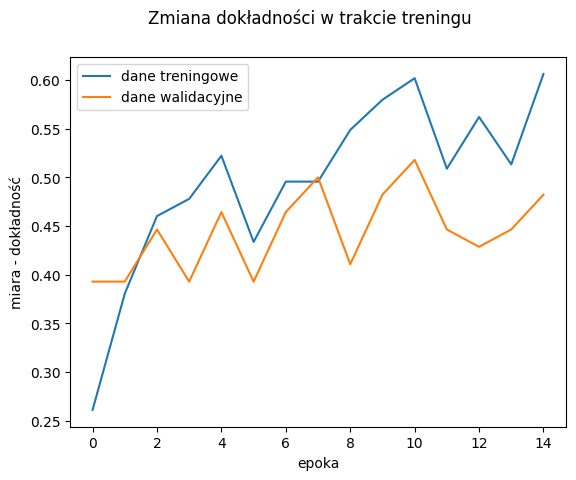

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure()
figure.suptitle("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history_scratch.history['accuracy'])
plt.plot(history_scratch.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

**2b.** Stwórz nowy model, wykorzystując model MobileNetV2 z wagami *ImageNet*, ale dla pierwszych 50 warstw zablokuj możliwość ich treningu. Podobnie jak w poprzednim podejściu wytrenuj go, wykorzystującą tę samą ilość epok. Wyświetl wykres zmiany dokładności klasyfikacji dla danych treningowych i testowych oraz porównaj uzyskane wyniki z podejściem trenowania tego modelu od podstaw.

In [ ]:
# tutaj umieść rozwiązanie
mobilenet_base_scratch = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in mobilenet_base_scratch.layers[:50]:
    layer.trainable = False

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
data_augm = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ])

input = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(input)
x = data_augm(x)
x = mobilenet_base_scratch(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(6)(x)

mobilenet_pm_scratch = tf.keras.Model(input, output)

adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
mobilenet_pm_scratch.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])

# Wytrenuj model
epochs_mobilenet = 15
history_scratch = mobilenet_pm_scratch.fit(
    pm_t_opt,
    epochs=epochs_mobilenet,
    validation_data=pm_v_opt
)

Epoch 1/15
8/8 [==============================] - 43s 763ms/step - loss: 2.0656 - accuracy: 0.1858 - val_loss: 1.3085 - val_accuracy: 0.5357
Epoch 2/15
8/8 [==============================] - 18s 595ms/step - loss: 1.1095 - accuracy: 0.6106 - val_loss: 0.9221 - val_accuracy: 0.7321
Epoch 3/15
8/8 [==============================] - 17s 500ms/step - loss: 0.7551 - accuracy: 0.7655 - val_loss: 0.7408 - val_accuracy: 0.7500
Epoch 4/15
8/8 [==============================] - 17s 490ms/step - loss: 0.5314 - accuracy: 0.8451 - val_loss: 0.6205 - val_accuracy: 0.7857
Epoch 5/15
8/8 [==============================] - 19s 808ms/step - loss: 0.4329 - accuracy: 0.8584 - val_loss: 0.5279 - val_accuracy: 0.8214
Epoch 6/15
8/8 [==============================] - 17s 559ms/step - loss: 0.2930 - accuracy: 0.9248 - val_loss: 0.4551 - val_accuracy: 0.8571
Epoch 7/15
8/8 [==============================] - 17s 497ms/step - loss: 0.2401 - accuracy: 0.9336 - val_loss: 0.4010 - val_accuracy: 0.8929
Epoch 8/15
8/

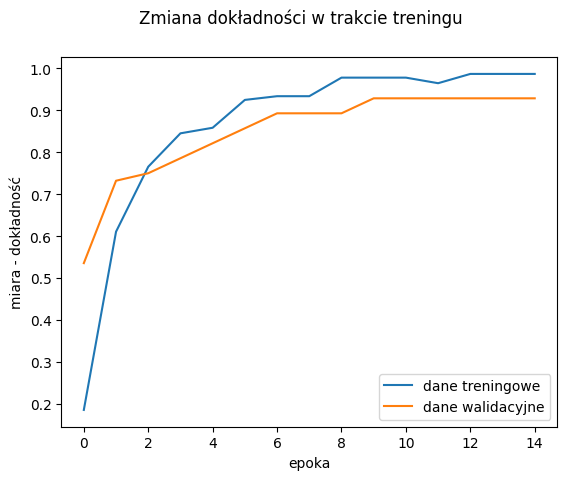

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure()
figure.suptitle("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history_scratch.history['accuracy'])
plt.plot(history_scratch.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

Wyniki uzyskane przez ten model są znacznie wyższe niż w przypadku modelu trenowanego od podstaw.

# 4. Forma i zawartość sprawozdania

Sprawozdanie powinno zawierać kopie ekranu stworzonych kodów i wyników ich działania dla zadań, które w instrukcji zostały oznaczone kolorem zielonym oraz stosowne komentarze, jeśli zadanie tego wymaga. Dokument powinien zostać przesłany na serwer wskazany przez prowadzącego ćwiczenie w formacie PDF.  

# Dodatki

Załącznik 1: Instrukcja wraz z wykonywalnymi kodami programów w formie pliku Jupyter Notebook

Załącznik 2: Zbiór danych Recyclable Materials

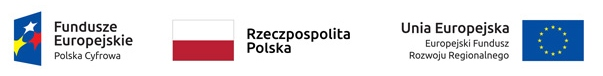